19 out of 20 predictions correct
18 out of 20 predictions correct
19 out of 20 predictions correct


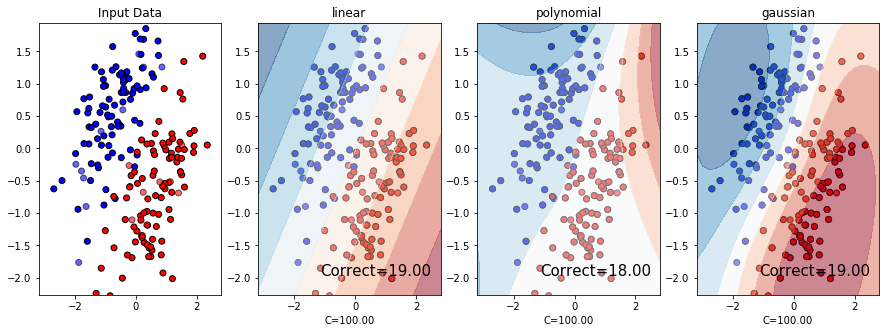

In [8]:
import generate as g
import svm_yooyeon as s
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
%matplotlib inline

X1,y1,X2,y2 = g.gen_lin_separable_overlap_data()
X_train, y_train, X_test, y_test = g.split_train(X1,y1,X2,y2)


names = ['Data', 'linear','polynomial','gaussian']
models = [None, s.SVM(kernel = 'linear', C=100.00), s.SVM(kernel = 'polynomial', C=100.00), s.SVM(kernel = 'gaussian', C=100.00)]
h=0.2

figure = plt.figure(figsize=(19, 5))  

for i, (name, model) in enumerate(zip(names, models)):
    
    ax = plt.subplot(1, len(models)+1, i+1)
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
    # xx: X_train, yy: X_test : each(26*29)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    e
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #scatter x of train data 
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("Input Data")
    X_train, y_train, X_test, y_test
    if i != 0:
        ax = plt.subplot(1, len(models)+1, i+1)    
        x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
        y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        
        cm = plt.cm.RdBu 
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])

        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
        #per model: fit
        model.fit(X_train, y_train)
        
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # whole x values(754 by 2) 
        Z = Z.reshape(xx.shape) # (754 by 2) -> (26*29) reshape 
        # show the predicted y values by contouring
        ax.contourf(xx,yy,Z,cmap=cm,alpha=0.5) 
            
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        
        y_predict = model.signpredict(X_test) 
        correct = np.sum(y_predict == y_test)
        
        ax.set_title(name)
        ax.set_xlabel('C=%.2f' % model.C)
        ax.text(xx.max() - .3, yy.min() + .3, ('Correct=%.2f' % correct).lstrip('0'), size=15, horizontalalignment='right')
    
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

